In [7]:
# Dull vs Bright
import os
import cv2
import numpy as np
def dull_bright_pred(image_path):
    img = cv2.imread(image_path)

    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    saturation = hsv_img[:, :, 1]
    value = hsv_img[:, :, 2]

    dull_saturation_threshold = 100
    dull_value_threshold = 100

    dull_mask = (saturation<dull_saturation_threshold) & (value<dull_value_threshold)
    dull_percent = np.sum(dull_mask)/saturation.size * 100
    if dull_percent>50:
        print("This is a dull image")
    else:
        print("This is a bright image")

dull_bright_pred(os.path.join(os.getcwd(), 'img.jpg'))

This is a bright image


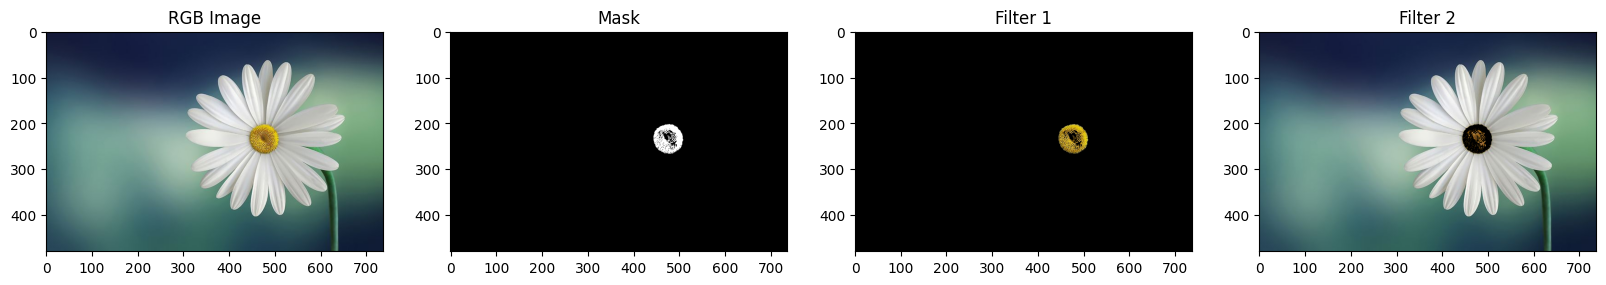

In [15]:
# Color Thresholding
import matplotlib.pyplot as plt
img = cv2.imread("img.jpg")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_y = np.array([20, 100, 100])
upper_y = np.array([30, 255, 255])

mask = cv2.inRange(img_hsv, lower_y, upper_y)
filter1 = cv2.bitwise_and(img_rgb, img_rgb, mask = mask)

mask_inv = cv2.bitwise_not(mask)
filter2 = cv2.bitwise_and(img_rgb, img_rgb, mask = mask_inv)

plt.figure(figsize=(20, 25))
plt.subplot(141), plt.imshow(img_rgb), plt.title("RGB Image")
plt.subplot(142), plt.imshow(mask, cmap="gray"), plt.title("Mask")
plt.subplot(143), plt.imshow(filter1), plt.title("Filter 1")
plt.subplot(144), plt.imshow(filter2), plt.title("Filter 2")
plt.show()